# Random Forest - Classification

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# Check for Missing Data

df.isnull().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

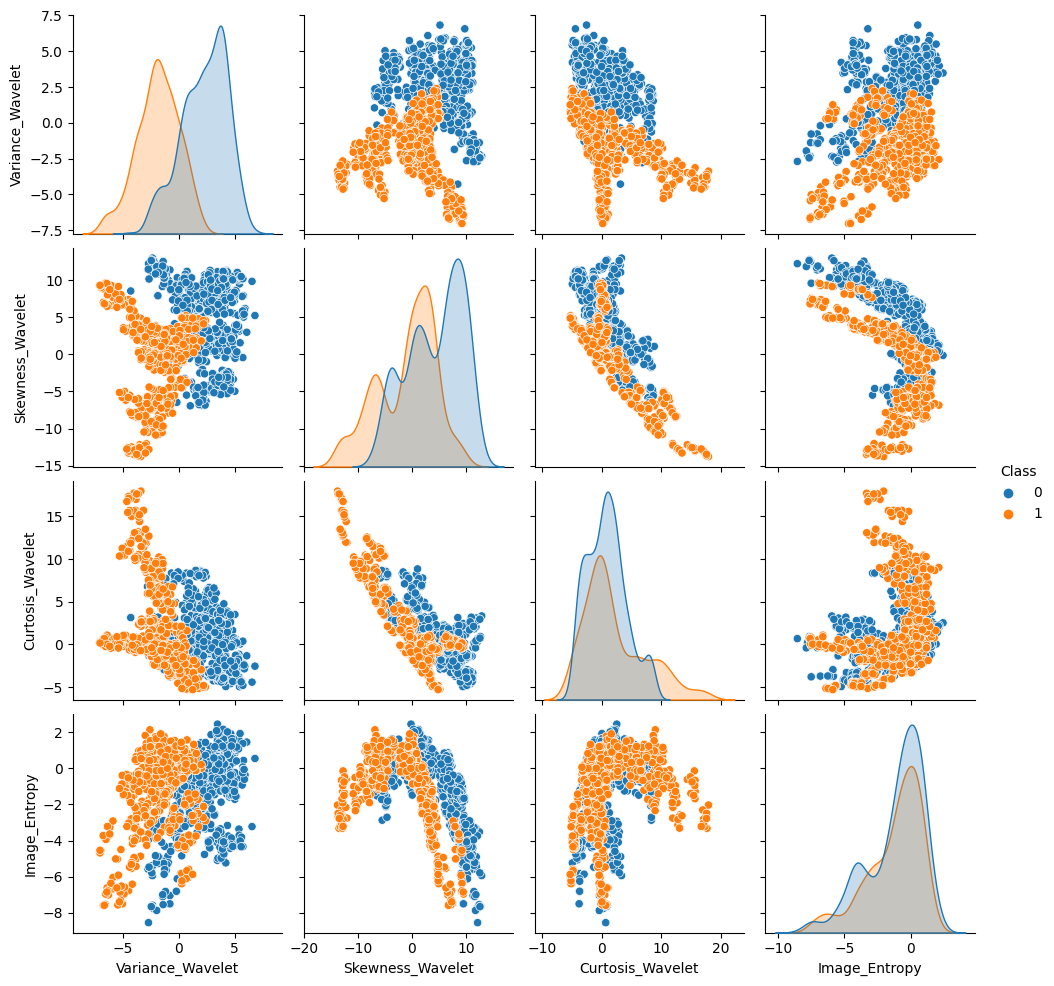

In [4]:
# EDA by graphs

sns.pairplot(df, hue='Class')

In [5]:
# Feature (X)

X = df.drop("Class", axis = 1)

In [6]:
# Feature (y)

y = df["Class"]

In [7]:
# Train-Test Split

from sklearn.model_selection import train_test_split

In [8]:
# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

In [9]:
# Grid Search Import

from sklearn.model_selection import GridSearchCV

In [10]:
# Random Forest Import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [11]:
# Configuration Lists

n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [12]:
# Param Grids

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}  # Note, oob_score only makes sense when bootstrap=True!

In [13]:
# GridSearch Proper

model = RandomForestClassifier()
grid = GridSearchCV(model ,param_grid)

In [14]:
# GridSearch Fitting

grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/li

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [15]:
# Identify Best Parameters

grid.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}

In [16]:
# Sample Predictions

predictions = grid.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0])

In [17]:
# Classification Report

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       124
           1       0.98      1.00      0.99        82

    accuracy                           0.99       206
   macro avg       0.99      0.99      0.99       206
weighted avg       0.99      0.99      0.99       206



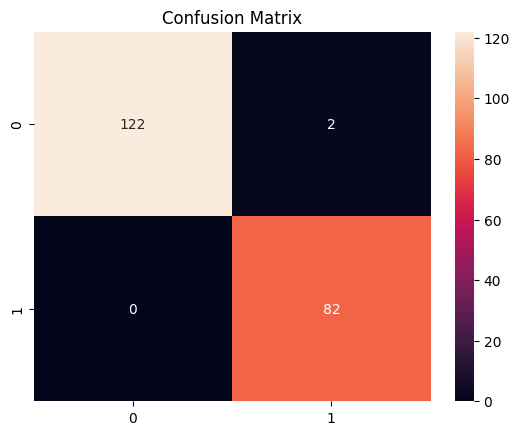

In [18]:
# Confusion Matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True, fmt = 'g').set(title = 'Confusion Matrix')
plt.show()

## Understanding Number of Estimators (Trees)

Let's plot out error vs. Number of Estimators

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
errors = []
misclassifications = []

for n in range(1,64):

    rfc = RandomForestClassifier(n_estimators = n,bootstrap = True, max_features = 2)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds, y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

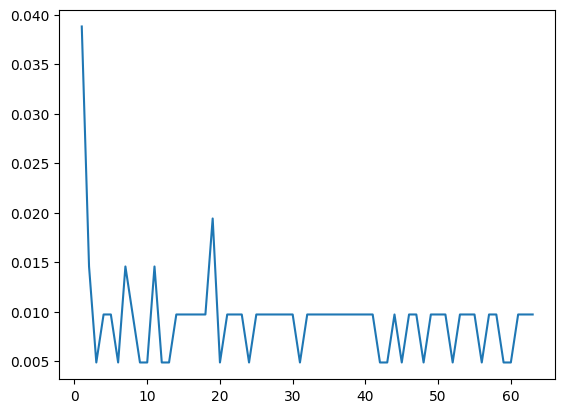

In [21]:
# Error Plot

plt.plot(range(1,64),errors)

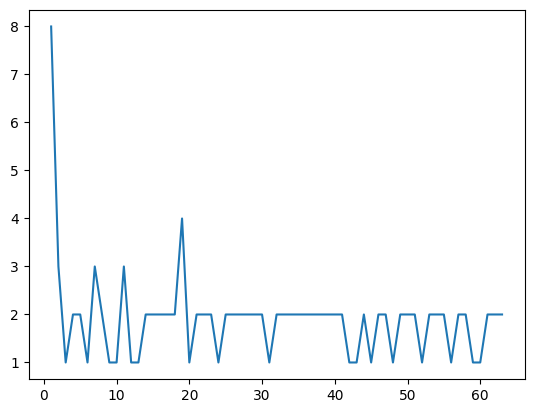

In [22]:
# Misclassification Plot

plt.plot(range(1,64), misclassifications)

In [23]:
# Random Forest (Text Representation)

from sklearn import tree

for i in range(0, len(rfc.estimators_)):

  text_representation = tree.export_text(rfc.estimators_[i], feature_names = X.columns.tolist())
  print('{}:'.format(i))
  print(text_representation)

0:
|--- Variance_Wavelet <= -0.21
|   |--- Image_Entropy <= -3.27
|   |   |--- Skewness_Wavelet <= 9.35
|   |   |   |--- Variance_Wavelet <= -0.74
|   |   |   |   |--- Variance_Wavelet <= -1.55
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Variance_Wavelet >  -1.55
|   |   |   |   |   |--- Curtosis_Wavelet <= -0.87
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Curtosis_Wavelet >  -0.87
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- Variance_Wavelet >  -0.74
|   |   |   |   |--- class: 0.0
|   |   |--- Skewness_Wavelet >  9.35
|   |   |   |--- class: 0.0
|   |--- Image_Entropy >  -3.27
|   |   |--- Skewness_Wavelet <= 4.09
|   |   |   |--- Image_Entropy <= 0.42
|   |   |   |   |--- Image_Entropy <= 0.03
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Image_Entropy >  0.03
|   |   |   |   |   |--- Skewness_Wavelet <= 0.65
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Skewness_Wavelet >  0.65
|   |   |   |   |   |   |--- 

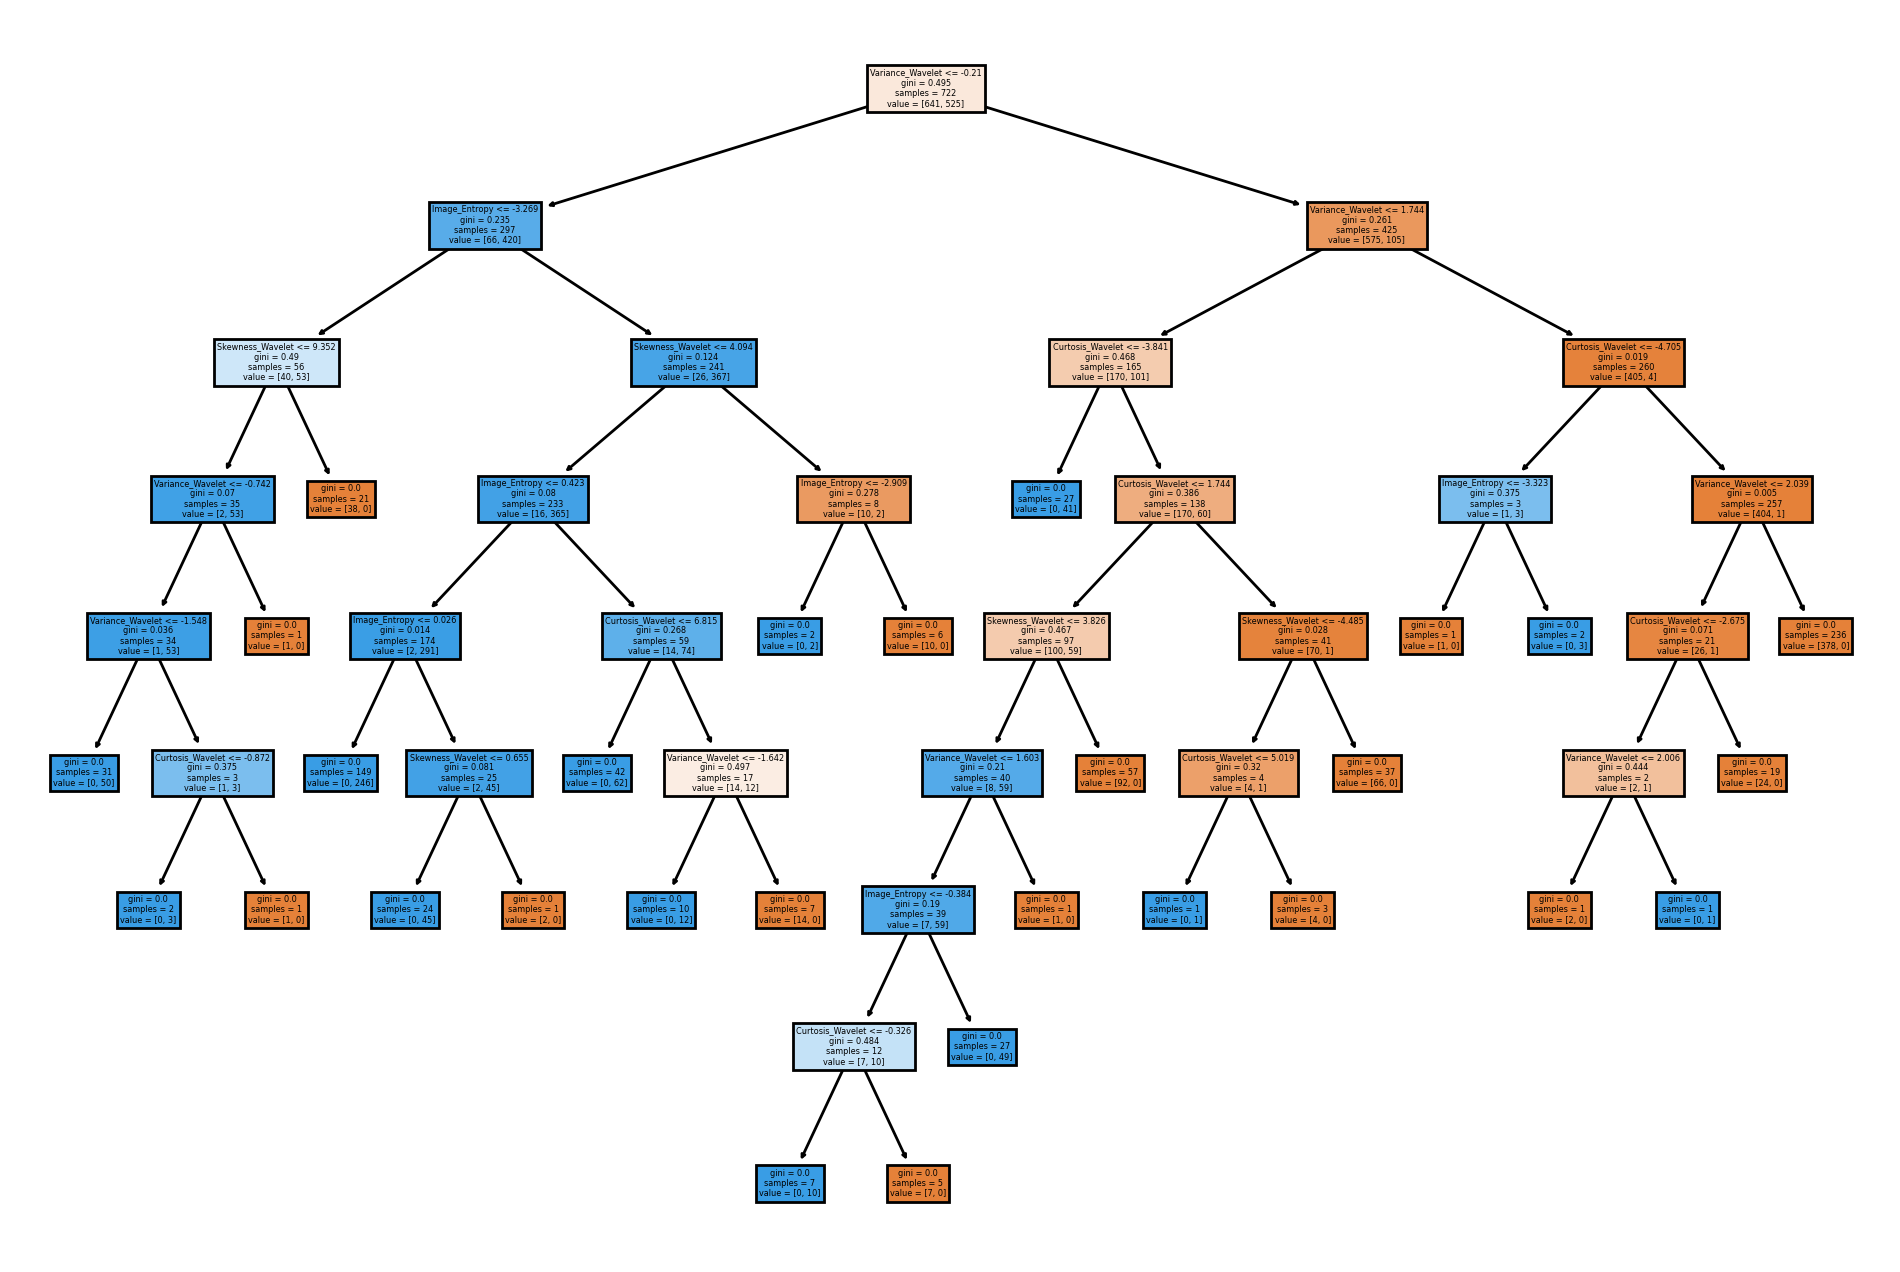

In [24]:
# Tree Visualization (Graph)

from sklearn.tree import plot_tree # Implementation, left (true), right (false)

plt.figure(figsize = (12,8), dpi = 200)
plot_tree(rfc.estimators_[0], feature_names = X.columns, filled = True);